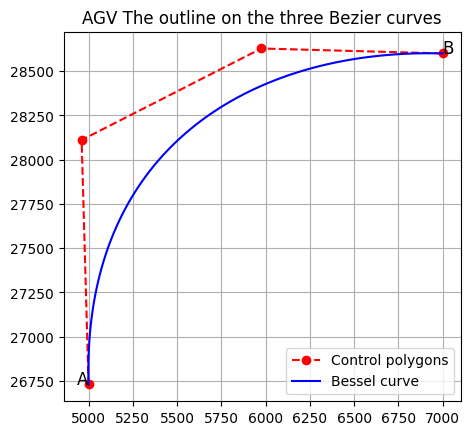

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义点的坐标
P0 = np.array([5000, 26730])  # 起点 A
P1 = np.array([4961, 28111])  # 控制点 1
P2 = np.array([5976, 28628])  # 控制点 2
P3 = np.array([7000, 28600])  # 终点 B


# 生成曲线上的点
t_curve = np.linspace(0, 1, 100)
coeff0 = (1 - t_curve)**3
coeff1 = 3 * (1 - t_curve)**2 * t_curve
coeff2 = 3 * (1 - t_curve) * t_curve**2
coeff3 = t_curve**3
x_curve = coeff0 * P0[0] + coeff1 * P1[0] + coeff2 * P2[0] + coeff3 * P3[0]
y_curve = coeff0 * P0[1] + coeff1 * P1[1] + coeff2 * P2[1] + coeff3 * P3[1]

# 绘制控制多边形
plt.plot([P0[0], P1[0], P2[0], P3[0]], [P0[1], P1[1], P2[1], P3[1]], 'ro--', label='Control polygons')

# 绘制贝塞尔曲线
plt.plot(x_curve, y_curve, 'b-', label='Bessel curve')

# 生成用于绘制矩形的 t 值
t_rect = np.linspace(0, 1, 11)

for i, t in enumerate(t_rect):
    # 计算 P(t)
    coeff0_t = (1 - t)**3
    coeff1_t = 3 * (1 - t)**2 * t
    coeff2_t = 3 * (1 - t) * t**2
    coeff3_t = t**3
    P_t = coeff0_t * P0 + coeff1_t * P1 + coeff2_t * P2 + coeff3_t * P3
    
    # 计算 T(t)
    coeff_T0_t = 3 * (1 - t)**2
    coeff_T1_t = 6 * (1 - t) * t
    coeff_T2_t = 3 * t**2
    T_t = coeff_T0_t * (P1 - P0) + coeff_T1_t * (P2 - P1) + coeff_T2_t * (P3 - P2)
    
    mag = np.linalg.norm(T_t)
    if mag > 0:
        u = T_t / mag
    else:
        u = np.array([1, 0])  # 防止切线为零的情况（通常不会发生）
    
    v = np.array([-u[1], u[0]])

# 添加起点 A 和终点 B 的标签
plt.text(P0[0], P0[1], 'A', fontsize=12, ha='right')
plt.text(P3[0], P3[1], 'B', fontsize=12, ha='left')

# 设置坐标轴比例相等
plt.gca().set_aspect('equal')

# 添加图例
plt.legend()

# 添加标题
plt.title('AGV The outline on the three Bezier curves')

# 添加网格线
plt.grid(True)

# 显示图形
plt.show()